In [63]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))
import matplotlib.pyplot as plt
import matplotx
plt.style.use(matplotx.styles.dracula)
plt.rcParams['figure.figsize'] = [20, 6]

In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
from classes.gen_helper import (EDA , FeatureEngineering, ModelTraining, Model_Finder)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.over_sampling import RandomOverSampler
import pickle
import os 

#ML Algothrims
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier)
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, make_scorer
import gzip 

In [65]:
df = pd.read_csv("./data/indian_liver_patient.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [67]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,583.0,NaN,NaN,NaN,44.746141,16.189833,4.0,33.0,45.0,58.0,90.0
Gender,583,2,Male,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Bilirubin,583.0,NaN,NaN,NaN,3.298799,6.209522,0.4,0.8,1.0,2.6,75.0
Direct_Bilirubin,583.0,NaN,NaN,NaN,1.486106,2.808498,0.1,0.2,0.3,1.3,19.7
Alkaline_Phosphotase,583.0,NaN,NaN,NaN,290.576329,242.937989,63.0,175.5,208.0,298.0,2110.0
Alamine_Aminotransferase,583.0,NaN,NaN,NaN,80.713551,182.620356,10.0,23.0,35.0,60.5,2000.0
Aspartate_Aminotransferase,583.0,NaN,NaN,NaN,109.910806,288.918529,10.0,25.0,42.0,87.0,4929.0
Total_Protiens,583.0,NaN,NaN,NaN,6.48319,1.085451,2.7,5.8,6.6,7.2,9.6
Albumin,583.0,NaN,NaN,NaN,3.141852,0.795519,0.9,2.6,3.1,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,NaN,NaN,NaN,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8


In [68]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols

['Age',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset']

In [69]:
#Check if the any column is having the ZERO std
data_described = df.describe()
for i in num_cols:
    print(i , data_described[i]['std'])

Age 16.18983330469438
Total_Bilirubin 6.209521726180149
Direct_Bilirubin 2.8084976176589644
Alkaline_Phosphotase 242.93798917934396
Alamine_Aminotransferase 182.62035603420242
Aspartate_Aminotransferase 288.9185290517341
Total_Protiens 1.0854514840234657
Albumin 0.7955188059640255
Albumin_and_Globulin_Ratio 0.3195921076723706
Dataset 0.4524901515081165


In [70]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Dataset'] = df['Dataset'].replace({2:0})
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [71]:
df.Dataset.value_counts()

1    416
0    167
Name: Dataset, dtype: int64

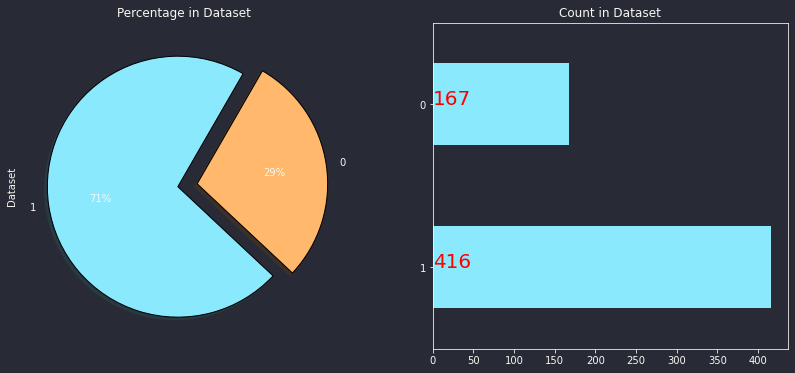

In [72]:
eda = EDA(df)
eda.plot_pie(target='Dataset')

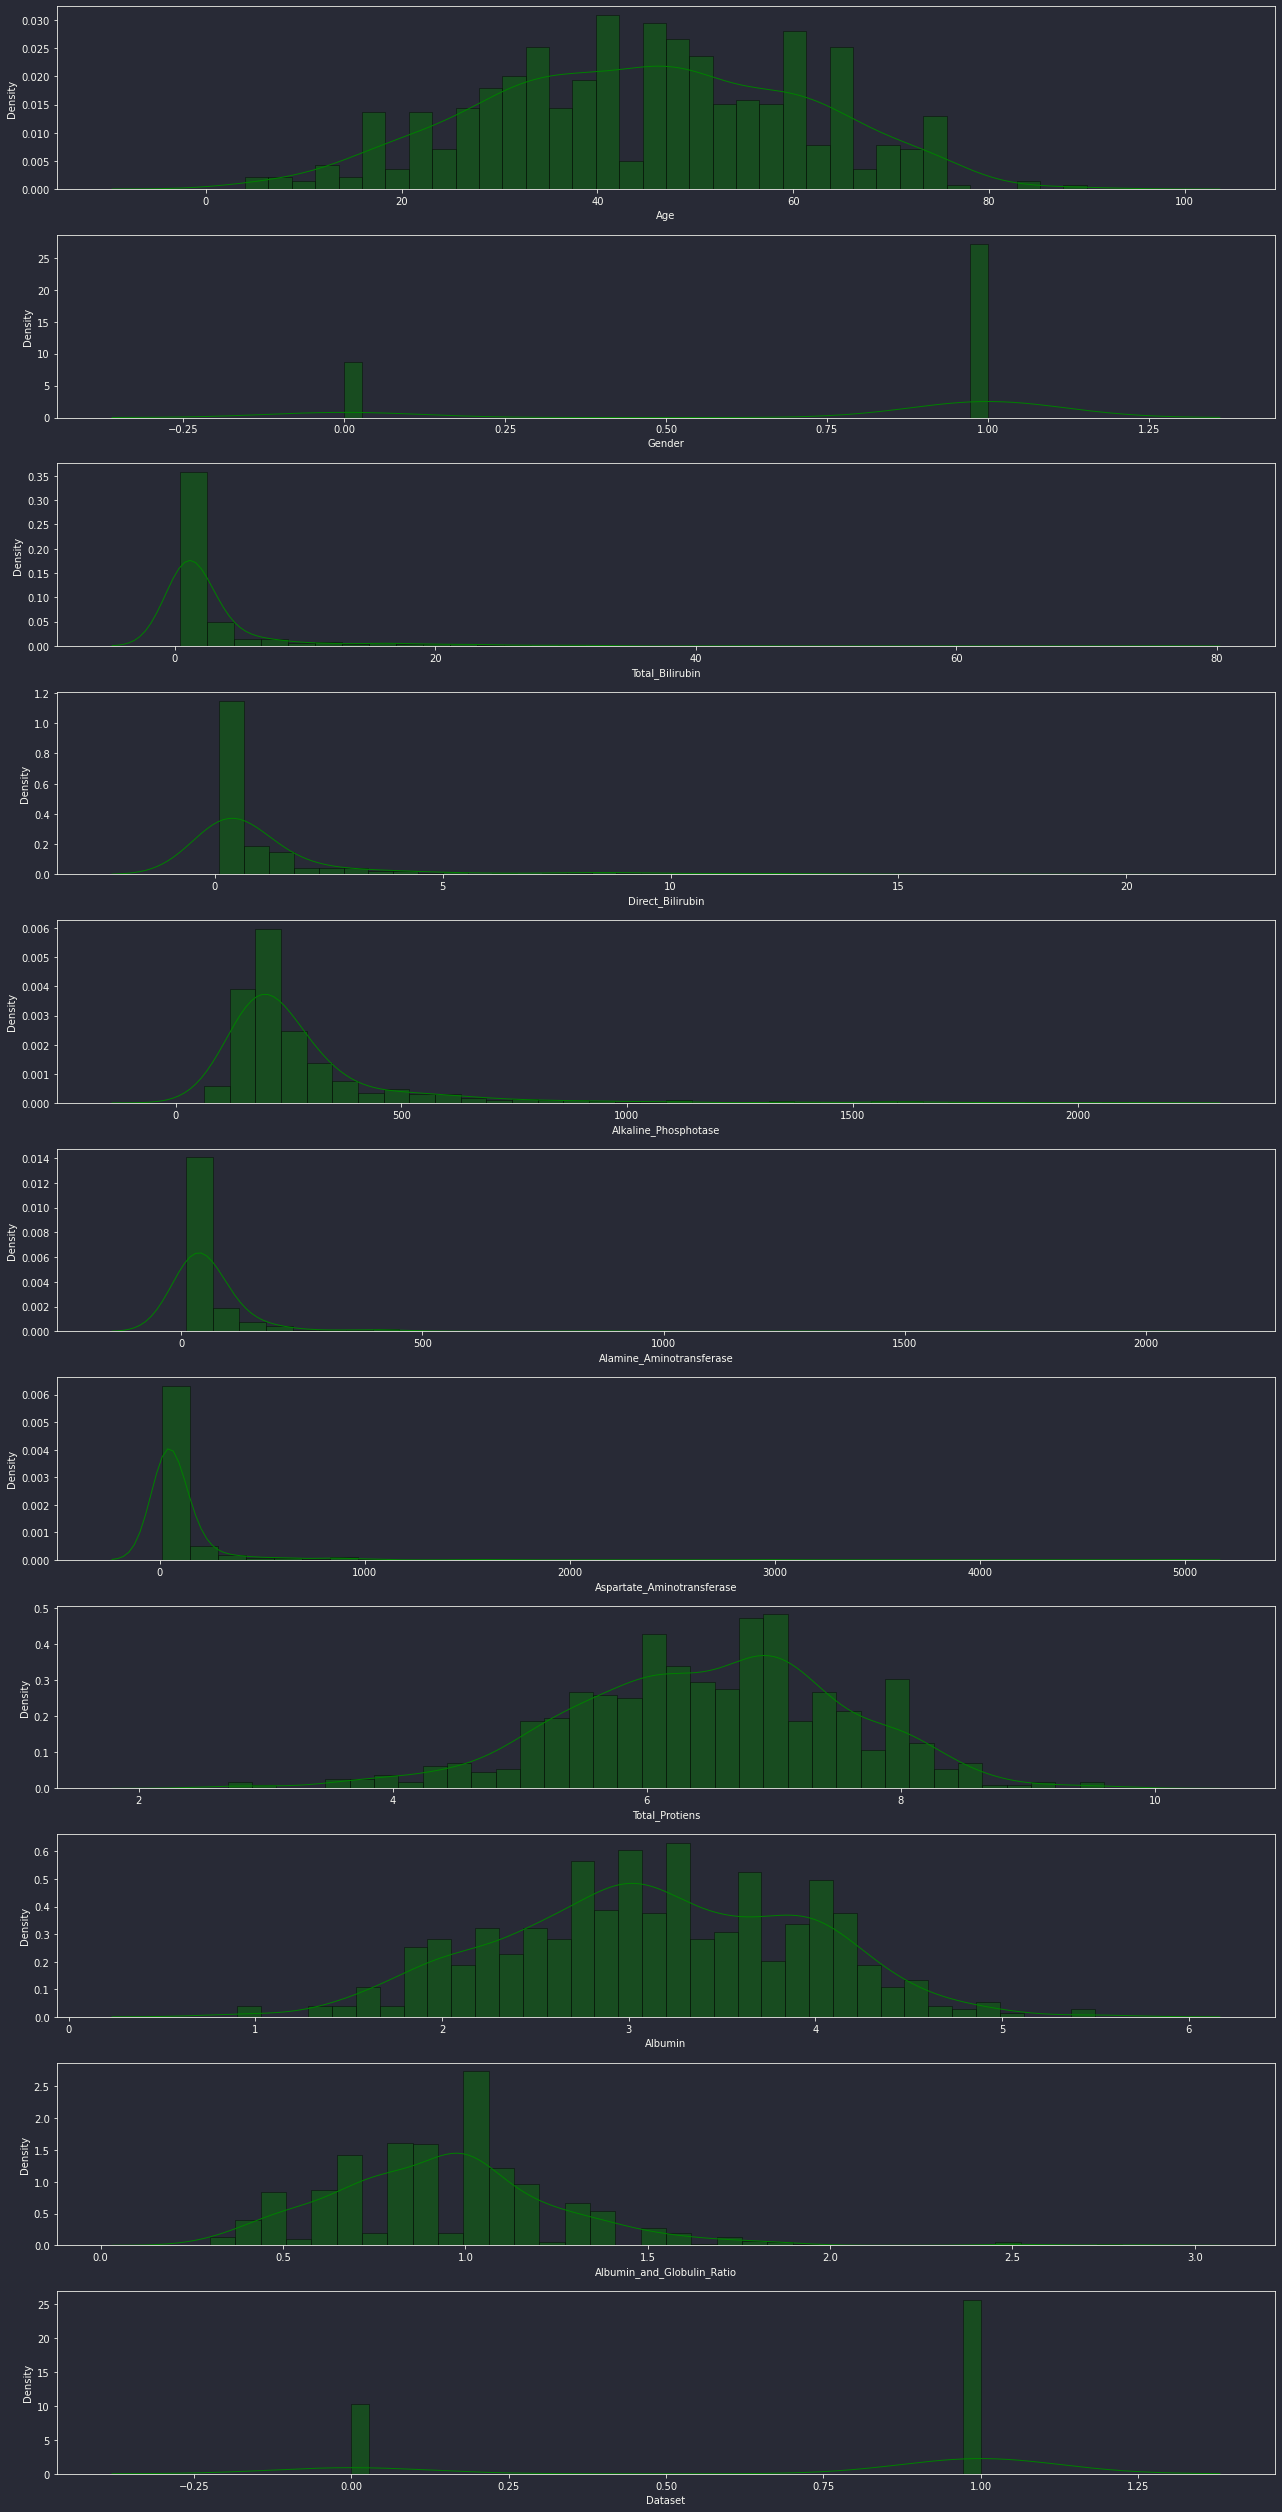

In [73]:
eda.plot_histogram(df, columns=1, fig_height=35)

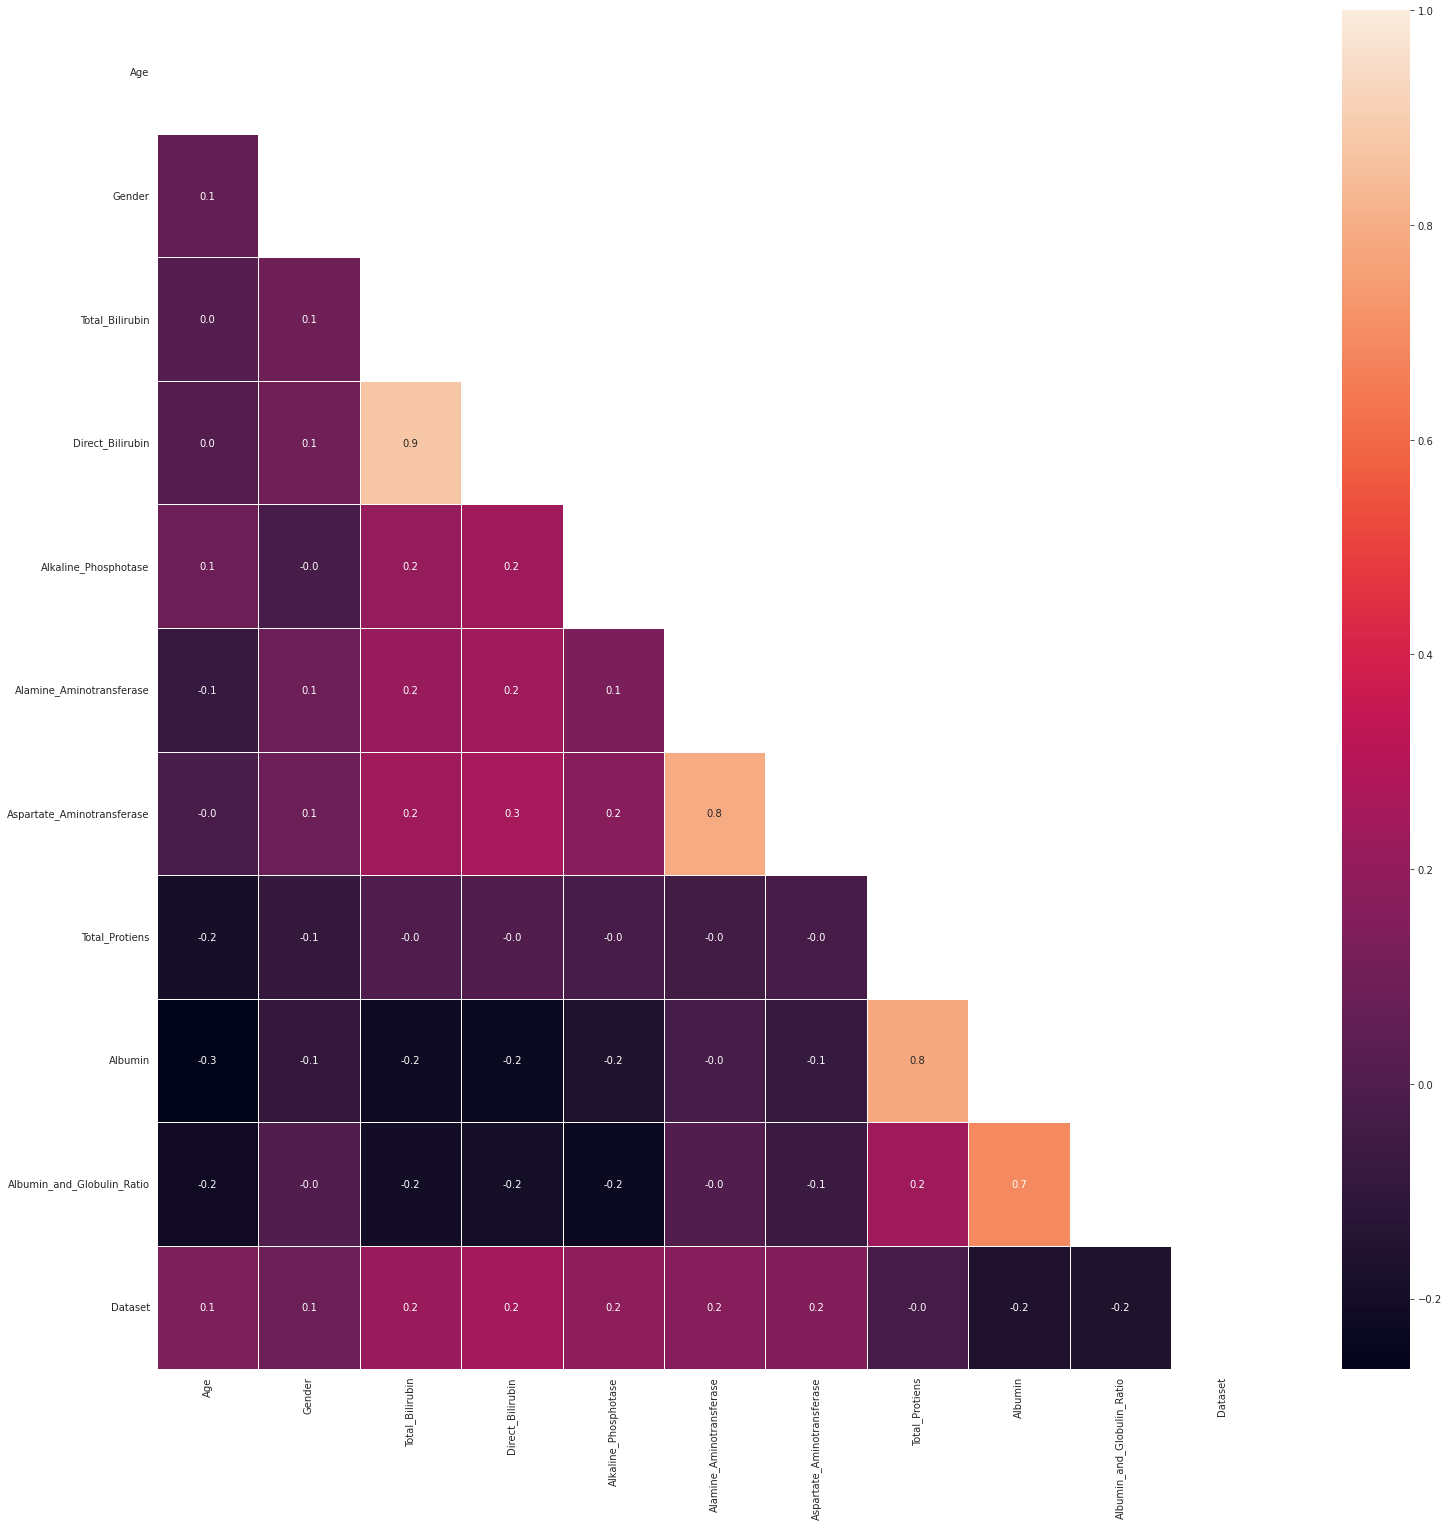

In [74]:
eda.corr_map(df)

In [75]:
y = df.Dataset
X = df.drop('Dataset',axis = 1 )
cols = X.columns
X = SimpleImputer(strategy='mean').fit_transform(X)
X  = pd.DataFrame(X, columns=cols)
X 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60.0,1.0,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37
579,40.0,1.0,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10
580,52.0,1.0,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00
581,31.0,1.0,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00


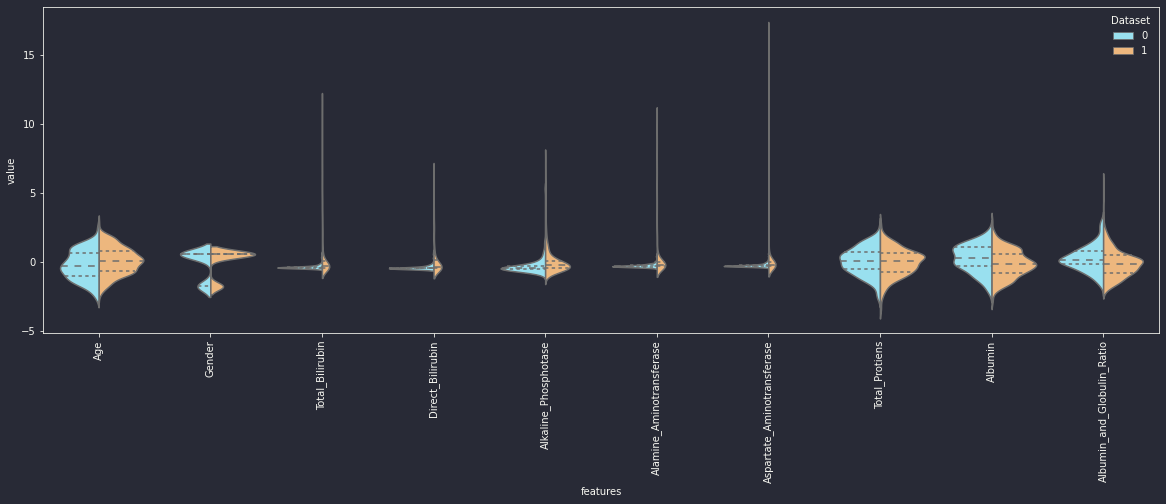

In [76]:
eda.voilin_plot(X,y, total_features_to_include=10)

In [77]:
#VIF 
fe = FeatureEngineering()
vif = fe.calculate_vif(X)
vif

,Features,VIF_Values
8,Albumin,133.055715
7,Total_Protiens,101.860900
9,Albumin_and_Globulin_Ratio,25.717649
0,Age,7.813077
3,Direct_Bilirubin,5.736207
2,Total_Bilirubin,5.479228
1,Gender,4.087526
5,Alamine_Aminotransferase,3.308649
6,Aspartate_Aminotransferase,3.192721
4,Alkaline_Phosphotase,2.650280


## Model Training And Evaluation 

In [78]:
most_import_features = fe.select_features(X.drop(columns=['Direct_Bilirubin', 'Aspartate_Aminotransferase','Albumin']), y, top_n_features=7).Columns.to_list()
len(most_import_features)

7

In [79]:
most_import_features

['Alamine_Aminotransferase',
 'Alkaline_Phosphotase',
 'Total_Bilirubin',
 'Age',
 'Albumin_and_Globulin_Ratio',
 'Gender',
 'Total_Protiens']

In [80]:
X_train, X_test, y_train,  y_test = train_test_split(X[most_import_features], y, test_size=0.15, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((495, 7), (495,), (88, 7), (88,))

In [84]:
training = ModelTraining()

C:\Users\92304\anaconda3\envs\complete-healthcare\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 6.44 s


<AxesSubplot:>

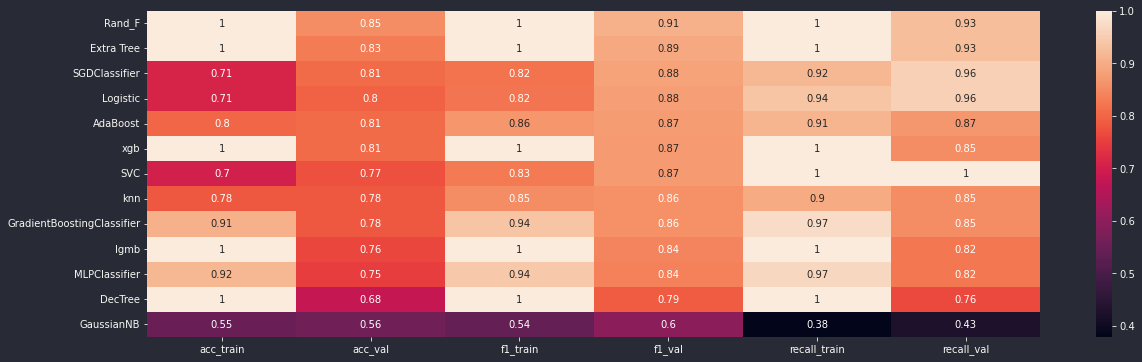

In [85]:
%%time
models = {
          'knn' : KNeighborsClassifier(),
          'Logistic': LogisticRegression(),
          'AdaBoost' : AdaBoostClassifier(),
          'DecTree': DecisionTreeClassifier(),
          'MLPClassifier' : MLPClassifier(max_iter=10000),
          'lgmb' : lgbm.LGBMClassifier(),
          'xgb' : XGBClassifier(objective='binary:logistic'),
          'SGDClassifier' : SGDClassifier(),
          'GaussianNB' : GaussianNB(),
          #'MultinomialNB': MultinomialNB(),
          'GradientBoostingClassifier' : GradientBoostingClassifier(),
          'SVC' : SVC(),
          'Extra Tree' : ExtraTreesClassifier(),
          'Rand_F' : RandomForestClassifier()
         }
sns.heatmap(training.compare_base_classifiers(models, X_train=X_train, y_train=y_train, X_val=X_test , y_val=y_test,
                                              imputer= SimpleImputer(missing_values= np.nan, strategy='mean'), scaler=StandardScaler(), 
                                              poly = PolynomialFeatures(degree=1, include_bias = True),
                                              cols_to_impute=X_train.columns, sort_by='f1_val'), annot=True);

In [26]:
model_finder = Model_Finder()

#### Hyperparameter tuning of best performing models

In [125]:
#ExtraTreesClassifier
param_grid={
        'n_estimators': range(50,126,25),
        'min_samples_leaf': range(20,50,5),
        'min_samples_split': range(15,36,5),
    }
CV_et = GridSearchCV(estimator= ExtraTreesClassifier() , param_grid=param_grid, cv= 5, verbose=2, scoring='accuracy')
pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', CV_et)
])
pipe_et = pipe.fit(X_train, y_train)
print(f"Best Parameters : {pipe_et.named_steps['classifier'].best_params_} ----- Best Score : {pipe_et.named_steps['classifier'].best_score_}" )


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END min_samples_leaf=20, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=20, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=20, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=20, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=20, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=20, min_samples_split=15, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=20, min_samples_split=15, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=20, min_samples_split=15, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=20, min_samples_split=15, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=20, min_samples_split=15, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=20, min_samples_split=15, n_est

[CV] END min_samples_leaf=20, min_samples_split=35, n_estimators=100; total time=   0.1s
[CV] END min_samples_leaf=20, min_samples_split=35, n_estimators=100; total time=   0.1s
[CV] END min_samples_leaf=20, min_samples_split=35, n_estimators=125; total time=   0.1s
[CV] END min_samples_leaf=20, min_samples_split=35, n_estimators=125; total time=   0.1s
[CV] END min_samples_leaf=20, min_samples_split=35, n_estimators=125; total time=   0.1s
[CV] END min_samples_leaf=20, min_samples_split=35, n_estimators=125; total time=   0.1s
[CV] END min_samples_leaf=20, min_samples_split=35, n_estimators=125; total time=   0.1s
[CV] END min_samples_leaf=25, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=25, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=25, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=25, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf

[CV] END min_samples_leaf=25, min_samples_split=35, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=25, min_samples_split=35, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=25, min_samples_split=35, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=25, min_samples_split=35, n_estimators=100; total time=   0.0s
[CV] END min_samples_leaf=25, min_samples_split=35, n_estimators=100; total time=   0.0s
[CV] END min_samples_leaf=25, min_samples_split=35, n_estimators=100; total time=   0.0s
[CV] END min_samples_leaf=25, min_samples_split=35, n_estimators=100; total time=   0.0s
[CV] END min_samples_leaf=25, min_samples_split=35, n_estimators=100; total time=   0.0s
[CV] END min_samples_leaf=25, min_samples_split=35, n_estimators=125; total time=   0.0s
[CV] END min_samples_leaf=25, min_samples_split=35, n_estimators=125; total time=   0.0s
[CV] END min_samples_leaf=25, min_samples_split=35, n_estimators=125; total time=   0.0s
[CV] END min_samples_lea

[CV] END min_samples_leaf=30, min_samples_split=35, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=30, min_samples_split=35, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=30, min_samples_split=35, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=30, min_samples_split=35, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=30, min_samples_split=35, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=30, min_samples_split=35, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=30, min_samples_split=35, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=30, min_samples_split=35, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=30, min_samples_split=35, n_estimators=100; total time=   0.1s
[CV] END min_samples_leaf=30, min_samples_split=35, n_estimators=100; total time=   0.0s
[CV] END min_samples_leaf=30, min_samples_split=35, n_estimators=100; total time=   0.0s
[CV] END min_samples_leaf=30,

[CV] END min_samples_leaf=35, min_samples_split=30, n_estimators=125; total time=   0.0s
[CV] END min_samples_leaf=35, min_samples_split=30, n_estimators=125; total time=   0.0s
[CV] END min_samples_leaf=35, min_samples_split=30, n_estimators=125; total time=   0.0s
[CV] END min_samples_leaf=35, min_samples_split=35, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=35, min_samples_split=35, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=35, min_samples_split=35, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=35, min_samples_split=35, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=35, min_samples_split=35, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=35, min_samples_split=35, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=35, min_samples_split=35, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=35, min_samples_split=35, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=35,

[CV] END min_samples_leaf=40, min_samples_split=30, n_estimators=100; total time=   0.0s
[CV] END min_samples_leaf=40, min_samples_split=30, n_estimators=100; total time=   0.0s
[CV] END min_samples_leaf=40, min_samples_split=30, n_estimators=100; total time=   0.0s
[CV] END min_samples_leaf=40, min_samples_split=30, n_estimators=125; total time=   0.0s
[CV] END min_samples_leaf=40, min_samples_split=30, n_estimators=125; total time=   0.0s
[CV] END min_samples_leaf=40, min_samples_split=30, n_estimators=125; total time=   0.0s
[CV] END min_samples_leaf=40, min_samples_split=30, n_estimators=125; total time=   0.0s
[CV] END min_samples_leaf=40, min_samples_split=30, n_estimators=125; total time=   0.0s
[CV] END min_samples_leaf=40, min_samples_split=35, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=40, min_samples_split=35, n_estimators=50; total time=   0.0s
[CV] END min_samples_leaf=40, min_samples_split=35, n_estimators=50; total time=   0.0s
[CV] END min_samples_lea

[CV] END min_samples_leaf=45, min_samples_split=30, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=45, min_samples_split=30, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=45, min_samples_split=30, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=45, min_samples_split=30, n_estimators=75; total time=   0.0s
[CV] END min_samples_leaf=45, min_samples_split=30, n_estimators=100; total time=   0.0s
[CV] END min_samples_leaf=45, min_samples_split=30, n_estimators=100; total time=   0.0s
[CV] END min_samples_leaf=45, min_samples_split=30, n_estimators=100; total time=   0.0s
[CV] END min_samples_leaf=45, min_samples_split=30, n_estimators=100; total time=   0.0s
[CV] END min_samples_leaf=45, min_samples_split=30, n_estimators=100; total time=   0.0s
[CV] END min_samples_leaf=45, min_samples_split=30, n_estimators=125; total time=   0.0s
[CV] END min_samples_leaf=45, min_samples_split=30, n_estimators=125; total time=   0.0s
[CV] END min_samples_leaf

0.8295454545454546
0.8965517241379309


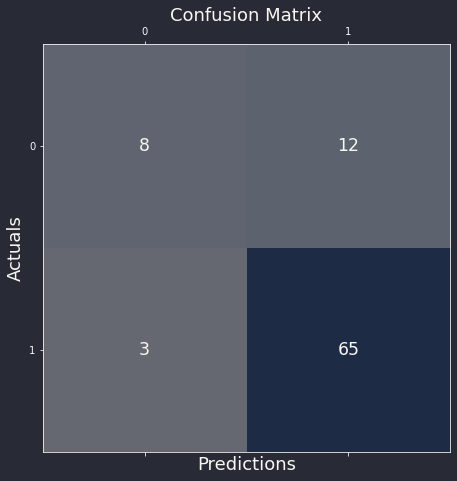

In [86]:
#min_samples_leaf = 20, min_samples_split = 15, n_estimators = 50
pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', ExtraTreesClassifier())  #performed best with the default params
])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
print(f1_score(y_test, pipe.predict(X_test)))
training.plot_cm(y_val = y_test, y_predicted = pipe.predict(X_test))

In [98]:
#RandomForest Classifier
param_grid = { 
    'n_estimators': [50, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,13],
    'criterion' :['gini', 'entropy']
}
CV_rf = GridSearchCV(estimator= RandomForestClassifier() , param_grid=param_grid, cv= 5, verbose=2, scoring='f1')
pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', CV_rf)
])
pipe_rf = pipe.fit(X_train, y_train)
print(f"Best Parameters : {pipe_rf.named_steps['classifier'].best_params_} ----- Best Score : {pipe_rf.named_steps['classifier'].best_score_}" )

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.3s
[C

[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=500; total time=   0.7s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=500; total time=   0.8s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=500; total time=   0.8s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estima

[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=500; total time=   0.5s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=500; total time=   0.5s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=500; total time=   0.6s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=500; total time=   0.5s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=500; total time=   0.5s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estima

[CV] END criterion=gini, max_depth=13, max_features=log2, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=13, max_features=log2, n_estimators=500; total time=   0.6s
[CV] END criterion=gini, max_depth=13, max_features=log2, n_estimators=500; total time=   0.6s
[CV] END criterion=gini, max_depth=13, max_features=log2, n_estimators=500; total time=   0.7s
[CV] END criterion=gini, max_depth=13, max_features=log2, n_estimators=500; total time=   1.1s
[CV] END criterion=gini, max_depth=13, max_features=log2, n_estimators=500; total time=   0.9s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_fe

[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=200; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=200; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=500; total time=   0.5s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=500; total time=   0.6s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=500; total time=   0.5s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=500; total time=   0.5s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=500; total time=   0.6s
[CV] END criterion=entropy, ma

[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=200; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=200; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=200; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=500; total time=   0.5s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=500; total time=   0.5s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=500; total time=   0.6s
[CV] END criterion=entropy, max_

[CV] END criterion=entropy, max_depth=13, max_features=sqrt, n_estimators=500; total time=   0.6s
[CV] END criterion=entropy, max_depth=13, max_features=sqrt, n_estimators=500; total time=   0.6s
[CV] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=200; total time=   0.2s
[CV] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=200; total time=   0.2s
[CV] END criterion=entrop

0.8068181818181818
0.8759124087591241


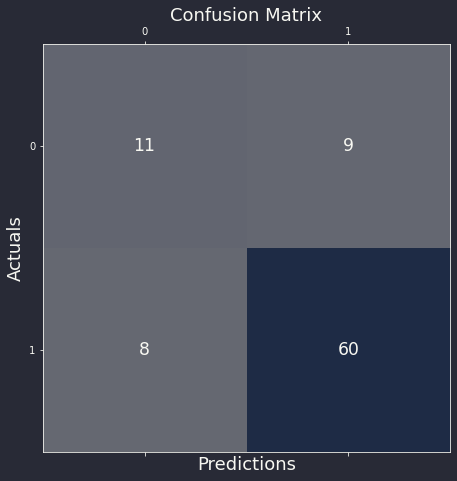

In [87]:
#criterion = 'entropy', max_depth = 4, max_features = 'log2', n_estimators = 25
pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', RandomForestClassifier()) #performed best the default params
])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
print(f1_score(y_test, pipe.predict(X_test)))
training.plot_cm(y_val = y_test, y_predicted = pipe.predict(X_test))

In [30]:
#hyperparameter tuning MLPClassifier
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
CV_MLP = GridSearchCV(estimator= MLPClassifier(max_iter=10000) , param_grid=param_grid, cv= 5, verbose=2, scoring='accuracy')
pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', CV_MLP)
])
pipe_MLP = pipe.fit(X_train, y_train)
print(f"Best Parameters : {pipe_MLP.named_steps['classifier'].best_params_} ----- Best Score : {pipe_MLP.named_steps['classifier'].best_score_}" )

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   1.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   1.0s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   4.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   5.7s
[CV] END activation=tanh, alpha=0.0001, 

[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   8.5s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   8.3s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   9.4s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   6.7s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=constant, solver=adam; total time=   6.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   1.9s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   2.2s
[CV] END activation=tanh, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total 

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   3.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   2.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=sgd; total time=   4.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   3.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   4.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   3.9s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solv

[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   4.1s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   4.0s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   3.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 50, 50), learning_rate=adaptive, solver=adam; total time=   4.6s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd; total time=   2.3s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd; total time=   2.4s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd; total time=   2.7s
[CV] END activation=relu, alpha=0.05, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd; tot

0.8522727272727273
0.9078014184397163


C:\Users\92304\anaconda3\envs\complete-healthcare\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


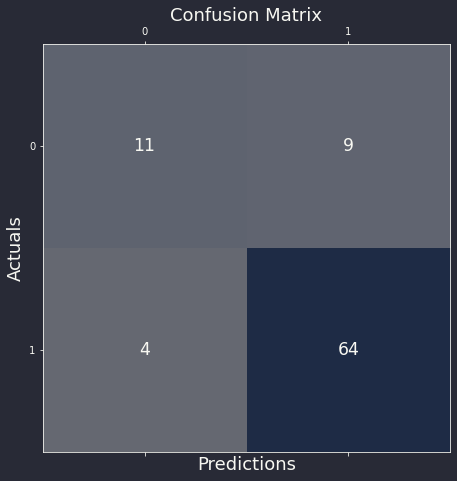

In [88]:
#activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'adaptive', solver = 'sgd'
pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', MLPClassifier(max_iter=100)) #default params performed better
])
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
print(f1_score(y_test, pipe.predict(X_test)))
training.plot_cm(y_val = y_test, y_predicted = pipe.predict(X_test))

0.8522727272727273
0.9051094890510949


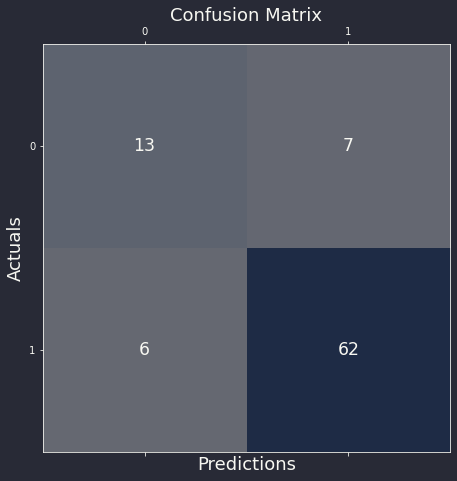

In [94]:
##VotingClassifier
rfc = RandomForestClassifier()
e_tree = ExtraTreesClassifier()
mlp = MLPClassifier(max_iter=10000)

voting_clf = VotingClassifier([('rfc', rfc),('mlp', mlp), ('e_tree', e_tree)],voting='soft', weights=[5,5,2])

pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', voting_clf)
])

pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
print(f1_score(y_test, pipe.predict(X_test)))
training.plot_cm(y_val = y_test, y_predicted = pipe.predict(X_test))

0.8409090909090909
0.9027777777777778


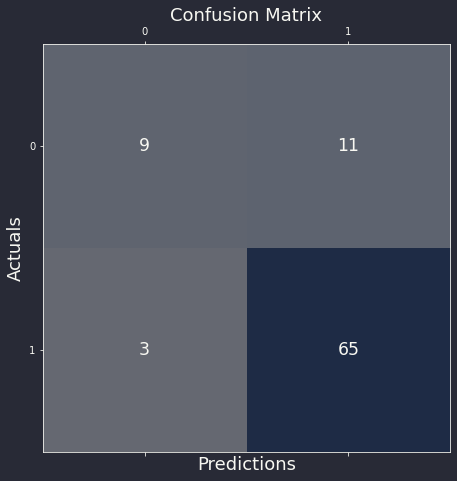

In [90]:
#StackingClassifier
estimators = [
    ('rf', RandomForestClassifier()),
    ('e_tree', ExtraTreesClassifier()),
    ('mlp' , MLPClassifier(max_iter=10000))
    ]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', stacking_clf)
])

pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
print(f1_score(y_test, pipe.predict(X_test)))
training.plot_cm(y_val = y_test, y_predicted = pipe.predict(X_test))

Wall time: 46.6 s


<AxesSubplot:>

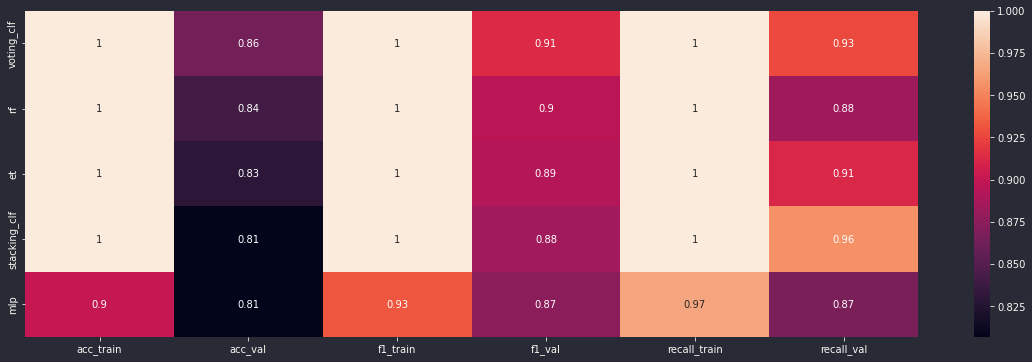

In [101]:
%%time 
models = {
    'rf': RandomForestClassifier(),
    'et': ExtraTreesClassifier(),
    'mlp' : MLPClassifier(max_iter=10000),
    'voting_clf': voting_clf,
    'stacking_clf': stacking_clf
}
sns.heatmap(training.compare_base_classifiers(models, X_train=X_train, y_train=y_train, X_val=X_test , y_val=y_test,
                                              imputer= SimpleImputer(missing_values= np.nan, strategy='mean'), scaler=StandardScaler(), 
                                              poly = PolynomialFeatures(degree=1, include_bias = True),
                                              cols_to_impute=X_train.columns, sort_by='f1_val'), annot=True);

In [92]:
#Training the model on complete dataset
X_complete = pd.concat([X_train, X_test], axis = 0)
y_complete = pd.concat([y_train, y_test], axis = 0)
X_complete.shape, y_complete.shape

((583, 7), (583,))

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('classifier',
                 VotingClassifier(estimators=[('rfc', RandomForestClassifier()),
                                              ('mlp',
                                               MLPClassifier(max_iter=10000)),
                                              ('e_tree',
                                               ExtraTreesClassifier())],
                                  voting='soft', weights=[5, 5, 2]))])
1.0
1.0


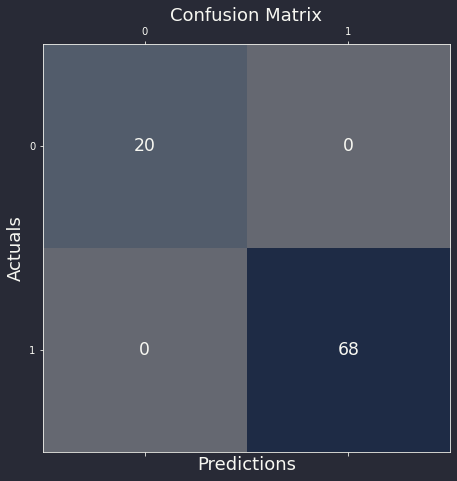

In [104]:
#final pipeline
pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values= np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1, include_bias = True)),
    ('classifier', voting_clf)
])
pipe.fit(X_complete, y_complete)
with gzip.open('./models/liver_model.pickle.gz', 'wb') as f:
    pickle.dump(pipe, f)
with gzip.open('./models/liver_model.pickle.gz', 'rb') as f:
    loaded_pipeline = pickle.load(f)
print(loaded_pipeline)
print(loaded_pipeline.score(X_test, y_test))
print(f1_score(y_test, loaded_pipeline.predict(X_test)))
training.plot_cm(y_val = y_test, y_predicted = loaded_pipeline.predict(X_test))

In [1]:
## RestAPI
import requests
res = requests.post('https://complete-healthcare.herokuapp.com/predict_liver', json={"values" : ["22","180","1.9","26.0","1.0","1.0","8.2"]})
if res.ok:
    print(res.text) #For text out put .json could be used to value output

No need to worry, as your probability of getting the disease is 37.15% which is less than 50%


In [105]:
loaded_pipeline.predict(X_complete)

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [106]:
(loaded_pipeline.predict_proba(X_complete[2:3])[0])*100

array([84.49443455, 15.50556545])

In [107]:
X_complete

,Alamine_Aminotransferase,Alkaline_Phosphotase,Total_Bilirubin,Age,Albumin_and_Globulin_Ratio,Gender,Total_Protiens
544,67.0,350.0,5.5,54.0,0.8,0.0,7.0
275,22.0,180.0,1.9,26.0,1.0,1.0,8.2
140,20.0,186.0,0.6,60.0,1.1,1.0,6.2
522,24.0,185.0,0.8,46.0,0.8,0.0,7.9
153,26.0,178.0,0.6,52.0,1.2,1.0,6.5
...,...,...,...,...,...,...,...
447,425.0,1550.0,23.3,45.0,0.8,0.0,7.7
353,110.0,621.0,1.4,48.0,1.1,0.0,7.2
79,48.0,670.0,2.8,58.0,0.5,0.0,4.7
238,40.0,190.0,0.9,35.0,1.8,0.0,7.3


In [109]:
X_complete.columns

Index(['Alamine_Aminotransferase', 'Alkaline_Phosphotase', 'Total_Bilirubin',
       'Age', 'Albumin_and_Globulin_Ratio', 'Gender', 'Total_Protiens'],
      dtype='object')